# **`Import Libraries`**

In [1]:
import numpy as np          
import pandas as pd              
import matplotlib.pyplot as plt  
from IPython import display
import random
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
# configure notebook to display plots
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Load Data

In [3]:
df5 = pd.read_csv(r"/gdrive/MyDrive/MSCDiss/train.csv")

In [4]:
df6 = pd.read_csv(r"/gdrive/MyDrive/MSCDiss/test.csv")

# Data Analysis

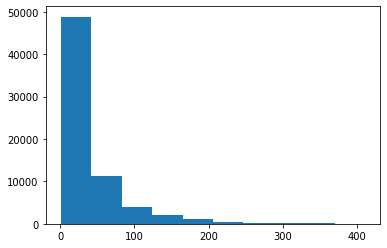

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = df5.subindex_n

plt.hist(x)
plt.show()

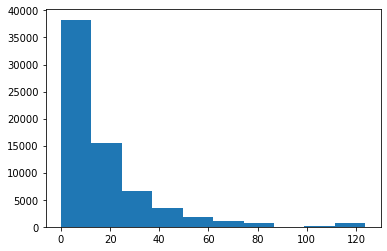

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = df5.los

plt.hist(x)
plt.show()

In [7]:
df1=df5.loc[df5['los'] <=31 ]
df2=df6.loc[df6['los'] <=31 ]

In [8]:
df1=df1.drop(['Unnamed: 0'],axis='columns')
df2=df2.drop(['Unnamed: 0'],axis='columns')
df1['news_date'] = pd.to_datetime(df1['news_date'])
df1['news_date'] = df1['news_date'].dt.hour
df2['news_date'] = pd.to_datetime(df2['news_date'])
df2['news_date'] = df2['news_date'].dt.hour

In [9]:
df=df2.ID

In [10]:
df1

ID        admin_date        disch_date  male  age       los  \
0         1  01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
1         1  01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
2         1  01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
3         1  01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
4         1  01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
...     ...               ...               ...   ...  ...       ...   
67983  2135  01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   
67984  2135  01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   
67985  2135  01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   
67986  2135  01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   
67987  2135  01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   

       news_date  NEWS2  syst  dias  ...  resp  o2_scale  o2_flow_rate  alert  \
0           13.0      1   142    63  ...    18         1           0.0      0   
1           17.0      3   121    71  ...    18         1           0.0      0   
2           18.0      2   123    70  ...    15         1           0.0      0   
3           23.0      1   126    59  ...    18         1           0.0      0   
4            2.0      0   138    80  ...    17         1           0.0      0   
...          ...    ...   ...   ...  ...   ...       ...           ...    ...   
67983       16.0      0   140    66  ...    15         1           0.0      0   
67984       22.0      1   144    75  ...    16         1           0.0      0   
67985        4.0      0   125    76  ...    17         1           0.0      0   
67986       10.0      0   133    68  ...    16         1           0.0      0   
67987       16.0      0   151    73  ...    16         1           0.0      0   

      NEWS1      CARS  subindex_n  submax_n                          hosp  \
0         1  0.030235           1        13                 York Hospital   
1         3  0.049313           2        13                 York Hospital   
2         2  0.036648           3        13                 York Hospital   
3         1  0.034234           4        13                 York Hospital   
4         0  0.022482           5        13                 York Hospital   
...     ...       ...         ...       ...                           ...   
67983     0  0.016557          24        28  Scarborough General Hospital   
67984     1  0.020751          25        28  Scarborough General Hospital   
67985     0  0.020833          26        28  Scarborough General Hospital   
67986     0  0.021350          27        28  Scarborough General Hospital   
67987     0  0.014250          28        28  Scarborough General Hospital   

       died  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
67983     0  
67984     0  
67985     0  
67986     0  
67987     0  

[56958 rows x 25 columns]

In [11]:
df2

ID        admin_date        disch_date  male  age       los  \
0      2140  01/09/2020 16:31  01/10/2020 14:43     0   80  0.925393   
1      2140  01/09/2020 16:31  01/10/2020 14:43     0   80  0.925393   
2      2140  01/09/2020 16:31  01/10/2020 14:43     0   80  0.925393   
3      2140  01/09/2020 16:31  01/10/2020 14:43     0   80  0.925393   
4      2140  01/09/2020 16:31  01/10/2020 14:43     0   80  0.925393   
...     ...               ...               ...   ...  ...       ...   
17720  2860  01/02/2020 02:04  01/03/2020 16:59     1   83  1.621713   
17721  2860  01/02/2020 02:04  01/03/2020 16:59     1   83  1.621713   
17722  2860  01/02/2020 02:04  01/03/2020 16:59     1   83  1.621713   
17723  2860  01/02/2020 02:04  01/03/2020 16:59     1   83  1.621713   
17724  2860  01/02/2020 02:04  01/03/2020 16:59     1   83  1.621713   

       news_date  NEWS2  syst  dias  ...  resp  o2_scale  o2_flow_rate  alert  \
0           18.0      4    98    68  ...    19         1           0.0      0   
1           20.0      3   111    78  ...    16         1           0.0      0   
2            2.0      2   110    70  ...    18         1           0.0      0   
3            6.0      2    92    52  ...    16         1           0.0      0   
4            8.0      1   114    62  ...    19         1           0.0      0   
...          ...    ...   ...   ...  ...   ...       ...           ...    ...   
17720       21.0      1   145    69  ...    17         1           0.0      0   
17721       23.0      1   118    59  ...    17         1           0.0      0   
17722        0.0      1   130    61  ...    17         1           0.0      0   
17723        4.0      1   124    93  ...    17         1           0.0      0   
17724        9.0      0   172    85  ...    17         1           0.0      0   

      NEWS1      CARS  subindex_n  submax_n           hosp  died  
0         0  0.081082           1         7  York Hospital     0  
1         0  0.065084           2         7  York Hospital     0  
2         0  0.052420           3         7  York Hospital     0  
3         0  0.053621           4         7  York Hospital     0  
4         1  0.042011           5         7  York Hospital     0  
...     ...       ...         ...       ...            ...   ...  
17720     1  0.031624          31        35  York Hospital     0  
17721     1  0.047103          32        35  York Hospital     0  
17722     1  0.034575          33        35  York Hospital     0  
17723     1  0.047219          34        35  York Hospital     0  
17724     0  0.023553          35        35  York Hospital     0  

[15997 rows x 25 columns]

In [12]:
df1.set_index(['ID', 'news_date'], inplace=True)
df1

admin_date        disch_date  male  age       los  \
ID   news_date                                                            
1    13.0       01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
     17.0       01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
     18.0       01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
     23.0       01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
     2.0        01/05/2020 13:00  01/07/2020 13:45     0   79  2.031313   
...                          ...               ...   ...  ...       ...   
2135 16.0       01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   
     22.0       01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   
     4.0        01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   
     10.0       01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   
     16.0       01/10/2020 20:52  01/16/2020 21:29     1   78  6.025671   

                NEWS2  syst  dias       temp  pulse  ...  resp  o2_scale  \
ID   news_date                                       ...                   
1    13.0           1   142    63  36.700001     89  ...    18         1   
     17.0           3   121    71  36.700001     81  ...    18         1   
     18.0           2   123    70  36.599998     87  ...    15         1   
     23.0           1   126    59  36.599998     79  ...    18         1   
     2.0            0   138    80  36.400002     85  ...    17         1   
...               ...   ...   ...        ...    ...  ...   ...       ...   
2135 16.0           0   140    66  36.299999     54  ...    15         1   
     22.0           1   144    75  36.400002     52  ...    16         1   
     4.0            0   125    76  36.099998     56  ...    17         1   
     10.0           0   133    68  36.200001     63  ...    16         1   
     16.0           0   151    73  36.299999     53  ...    16         1   

               o2_flow_rate  alert  NEWS1      CARS  subindex_n  submax_n  \
ID   news_date                                                              
1    13.0               0.0      0      1  0.030235           1        13   
     17.0               0.0      0      3  0.049313           2        13   
     18.0               0.0      0      2  0.036648           3        13   
     23.0               0.0      0      1  0.034234           4        13   
     2.0                0.0      0      0  0.022482           5        13   
...                     ...    ...    ...       ...         ...       ...   
2135 16.0               0.0      0      0  0.016557          24        28   
     22.0               0.0      0      1  0.020751          25        28   
     4.0                0.0      0      0  0.020833          26        28   
     10.0               0.0      0      0  0.021350          27        28   
     16.0               0.0      0      0  0.014250          28        28   

                                        hosp  died  
ID   news_date                                      
1    13.0                      York Hospital     0  
     17.0                      York Hospital     0  
     18.0                      York Hospital     0  
     23.0                      York Hospital     0  
     2.0                       York Hospital     0  
...                                      ...   ...  
2135 16.0       Scarborough General Hospital     0  
     22.0       Scarborough General Hospital     0  
     4.0        Scarborough General Hospital     0  
     10.0       Scarborough General Hospital     0  
     16.0       Scarborough General Hospital     0  

[56958 rows x 23 columns]

In [13]:
df2.set_index(['ID', 'news_date'], inplace=True)
#df2

Rename the **male** column to **gender**
and use LabelEncoder to change the **cnsrespons** column to numerical .

In [14]:
df1 = df1.rename(columns={'male': 'gender'})
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["cnsresponse1"] = le.fit_transform(df1["cnsresponse"])
data1= df1.drop('cnsresponse',axis= 'columns' )

In [15]:
df2= df2.rename(columns={'male': 'gender'})
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["cnsresponse1"] = le.fit_transform(df2["cnsresponse"])
data2= df2.drop('cnsresponse',axis= 'columns' )

In [16]:
X_train=data1.drop(['admin_date',	'disch_date',	'died','hosp','NEWS1','subindex_n'],axis='columns')
y_train=data1.died

In [17]:
X_test=data2.drop(['admin_date',	'disch_date',	'died','hosp','NEWS1','subindex_n'],axis='columns')
y_test=data2.died

In [18]:
X_train

gender  age       los  NEWS2  syst  dias       temp  pulse  \
ID   news_date                                                               
1    13.0            0   79  2.031313      1   142    63  36.700001     89   
     17.0            0   79  2.031313      3   121    71  36.700001     81   
     18.0            0   79  2.031313      2   123    70  36.599998     87   
     23.0            0   79  2.031313      1   126    59  36.599998     79   
     2.0             0   79  2.031313      0   138    80  36.400002     85   
...                ...  ...       ...    ...   ...   ...        ...    ...   
2135 16.0            1   78  6.025671      0   140    66  36.299999     54   
     22.0            1   78  6.025671      1   144    75  36.400002     52   
     4.0             1   78  6.025671      0   125    76  36.099998     56   
     10.0            1   78  6.025671      0   133    68  36.200001     63   
     16.0            1   78  6.025671      0   151    73  36.299999     53   

                sat  sup  resp  o2_scale  o2_flow_rate  alert      CARS  \
ID   news_date                                                            
1    13.0        94    0    18         1           0.0      0  0.030235   
     17.0        91    0    18         1           0.0      0  0.049313   
     18.0        93    0    15         1           0.0      0  0.036648   
     23.0        94    0    18         1           0.0      0  0.034234   
     2.0         96    0    17         1           0.0      0  0.022482   
...             ...  ...   ...       ...           ...    ...       ...   
2135 16.0        97    0    15         1           0.0      0  0.016557   
     22.0        95    0    16         1           0.0      0  0.020751   
     4.0         99    0    17         1           0.0      0  0.020833   
     10.0        97    0    16         1           0.0      0  0.021350   
     16.0        99    0    16         1           0.0      0  0.014250   

                submax_n  cnsresponse1  
ID   news_date                          
1    13.0             13             0  
     17.0             13             0  
     18.0             13             0  
     23.0             13             0  
     2.0              13             0  
...                  ...           ...  
2135 16.0             28             0  
     22.0             28             0  
     4.0              28             0  
     10.0             28             0  
     16.0             28             0  

[56958 rows x 17 columns]

# Padding

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
maxlen = 150
# get a list of unique IDs
trainId = X_train.index.levels[0]


In [21]:
# pad every patient sequence with 0 
# transforms the list of sequences to numpy array
X_train = [X_train.loc[ID].values for ID in trainId]
y_train = [y_train.loc[ID].values for ID in trainId]

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
y_train = tf.keras.preprocessing.sequence.pad_sequences(y_train, maxlen=maxlen, padding='post', truncating='post')


In [22]:
maxlen = 150
testId = X_test.index.levels[0]

In [23]:
X_test = [X_test.loc[ID].values for ID in testId]
y_test = [y_test.loc[ID].values for ID in testId]

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post',truncating='post')
y_test = tf.keras.preprocessing.sequence.pad_sequences(y_test, maxlen=maxlen, padding='post',truncating='post')


In [24]:
y_train=y_train.reshape(y_train.shape[0],y_train.shape[1],1)
y_test=y_test.reshape(y_test.shape[0],y_test.shape[1],1)

In [25]:
print("X_train shape: %s | y_train shape: %s" % (str(X_train.shape), str(y_train.shape)))
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))

X_train shape: (1879, 150, 17) | y_train shape: (1879, 150, 1)
X_test shape: (611, 150, 17) | y_test shape: (611, 150, 1)


# Model

In [26]:
from keras.layers import (
    Input,
    Dense,
    LSTM,
    GlobalAveragePooling1D,
    AveragePooling1D,
    TimeDistributed,
    Flatten,
    Bidirectional,
    Dropout,
    Masking,
    Layer,
    BatchNormalization
)
from keras.models import Model
from keras.optimizers import Adam,Nadam

In [27]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)


batch size of 128 which means that we update parameters every 128.
Use 100 training epochs, which means that we run through the data 100 times

In [28]:
BATCH_SIZE = 128
N_EPOCHS = 100

In [29]:
x = Input((X_train.shape[1],X_train.shape[2]) , name='input')
mask = Masking(0., name='input_masked')(x)
lstm = LSTM(128, name='lstm1', dropout=0.2,return_sequences= True)(mask)
# output: sigmoid layer
output =Dense(1, activation='sigmoid', name='output')(lstm)
model = Model(inputs = x, outputs = output)

# compile model
model.compile(optimizer=Nadam(learning_rate=0.005), loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 150, 17)]         0         
                                                                 
 input_masked (Masking)      (None, 150, 17)           0         
                                                                 
 lstm1 (LSTM)                (None, 150, 128)          74752     
                                                                 
 output (Dense)              (None, 150, 1)            129       
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, y_train, 
            batch_size=BATCH_SIZE, epochs=N_EPOCHS, 
            validation_split=0.2 ,callbacks=[early_stopping])

Epoch 1/100
12/12 [==============================] - 17s 1s/step - loss: 0.2915 - accuracy: 0.9183 - val_loss: 0.3242 - val_accuracy: 0.8625
Epoch 2/100
12/12 [==============================] - 9s 776ms/step - loss: 0.2510 - accuracy: 0.9258 - val_loss: 0.3343 - val_accuracy: 0.8625
Epoch 3/100
12/12 [==============================] - 4s 378ms/step - loss: 0.2418 - accuracy: 0.9257 - val_loss: 0.3469 - val_accuracy: 0.8625
Epoch 4/100
12/12 [==============================] - 5s 389ms/step - loss: 0.2369 - accuracy: 0.9267 - val_loss: 0.3433 - val_accuracy: 0.8625
Epoch 5/100
12/12 [==============================] - 6s 445ms/step - loss: 0.2383 - accuracy: 0.9268 - val_loss: 0.3307 - val_accuracy: 0.8640
Epoch 6/100
12/12 [==============================] - 4s 370ms/step - loss: 0.2292 - accuracy: 0.9263 - val_loss: 0.3162 - val_accuracy: 0.8686
Epoch 7/100
12/12 [==============================] - 6s 486ms/step - loss: 0.2333 - accuracy: 0.9267 - val_loss: 0.3689 - val_accuracy: 0.8626
E

In [31]:
preds = model.predict(X_test)

20/20 [==============================] - 2s 59ms/step


In [32]:
from sklearn.metrics import roc_curve, auc
# 0/1 binary lable for each patient
label = y_test[:, 0, :].squeeze();


In [33]:
preds1= preds[:,-1,:].squeeze()

In [34]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(label,preds1)
lstm_auc = metrics.auc(fpr, tpr)
print('ACU:',lstm_auc)

ACU: 0.9460068259385666


## Same Code applied for with sequence data with padding and Masking layer